In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.columns = df.columns.str.lower()  
df.columns #Remplazar nombres de columnas a minusculas 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df.loc[df['user_score']== 'tbd', 'user_score'] = np.nan #Para filtrar los valores igual a 'tbd' en mi columna 'user_score'
#np.nan para remplazar esos valores por valores nulos y que sea posible transformarlos a flotantes

In [7]:
df = df.astype({
    'year_of_release': 'Int64',  # Int64 permite valores nulos 
    'critic_score': 'float64',
    'user_score': 'float64'     # Convertir de objeto a float 
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
# Sumar las columnas de ventas y crear nueva columna 'global_sales'
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar las primeras filas
(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].head())

,name,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


Transforme los valores 'tbd' por datos nulos porque no los puedo hacer cero ya que estaria modificando la informacion.
El año se modifico por numero enteros.

<AxesSubplot:xlabel='year_of_release'>

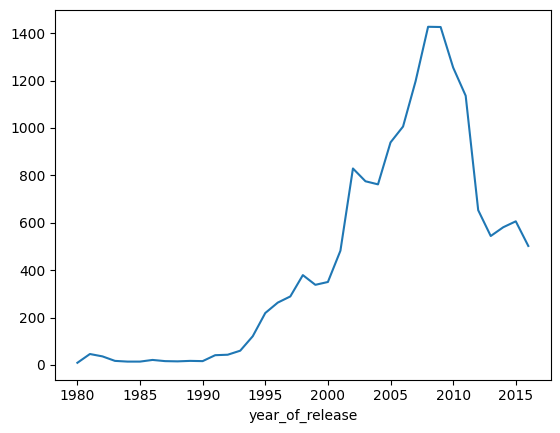

In [9]:
df.groupby('year_of_release')['name'].count().plot() #Para agrupar los datos de mi columna 'year_of_release' y contarlos para saber cuantas filas tengo en cada valor dentro de dicha colunma.
#.plot me ayuda a vizualizar la info de mejor manera 

In [10]:

# Agrupar por plataforma y sumar ventas globales
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Top 10 plataformas
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: global_sales, dtype: float64


In [11]:
#Agrupar la consola por su año de lanzamiento y su numero de ventas globales
ventas= df.groupby(['year_of_release', 'platform'])['global_sales'].sum().reset_index()
ventas_top = ventas.loc[ventas['platform'].isin(['PS2','X360', 'PS3', 'WII', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'])]


<AxesSubplot:xlabel='year_of_release', ylabel='global_sales'>

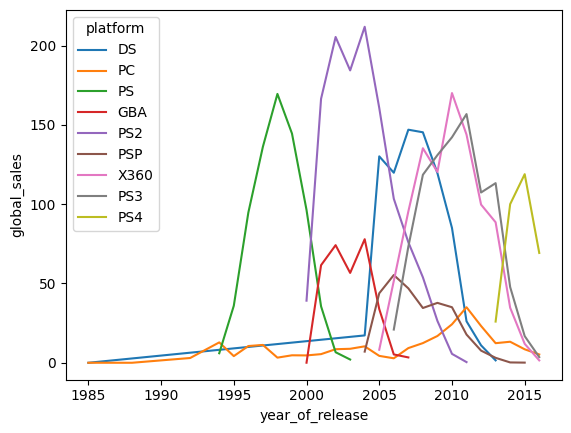

In [12]:
#Para graficar y comparar el comportamineto de ventas para cada una de las top 10 consolas mas vendidas
sns.lineplot(data=ventas_top, x='year_of_release', y= 'global_sales', hue='platform') 

Esta grafica me muestra las ventas globales de cada consola a lo largo de los años, donde se puede observar que el PS2  ha sido la consola mas vendida asi como tambien que cada consola tuvo su pico de ventas en u año de lanzamiento y decreciendo sus ventas, seguido por el pico de venta de la consola del siguiente año. siendo la PC la unica que se ha mantenido vigente a lo largo de los años a pesar de sus pocas ventas en comparacion con las consolas.

In [13]:
#Considerando de 4 a 5 a;os como la vigencia promedio por consola voy a determinar las consolas mas vendidas del 2013 en adelante
prospeccion = df.query('year_of_release >= 2013') 
prospeccion.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [14]:
plataformas_top = prospeccion.groupby(['year_of_release', 'platform'])['global_sales'].count()
plataformas_top1 =plataformas_top.unstack() #unstack: separa por indices y columnas


<AxesSubplot:xlabel='year_of_release'>

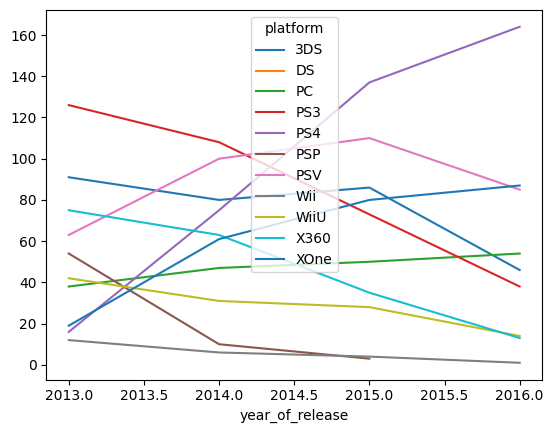

In [15]:
plataformas_top1.plot()

  ###

Podemos observar que plataformas tales como PS4, XOne y la PC son plataformas que sus ventas van en incremento despues de su fecha de lanzamiento, siendo el PS4 la consola mas vendida, con notable diferencia apartir del 2015. 
A si mismo podemos observar que consolas como PSV, X360, PS3, WiiU, 3DS y PSP; tienen una decaida de sus ventas despues del 2014, de esta manera podemos confirmar que la caida de sus ventas se debe a la aparicion en el mercado de consolas como el PS4 Y XOne, mientras que la PC, se comporta de manera independiente al lanzamiento de diferentes consolas con ligeros aumentos de sus ventas atraves de los años.

In [16]:
plataformas_top = plataformas_top.reset_index()

<AxesSubplot:xlabel='platform', ylabel='global_sales'>

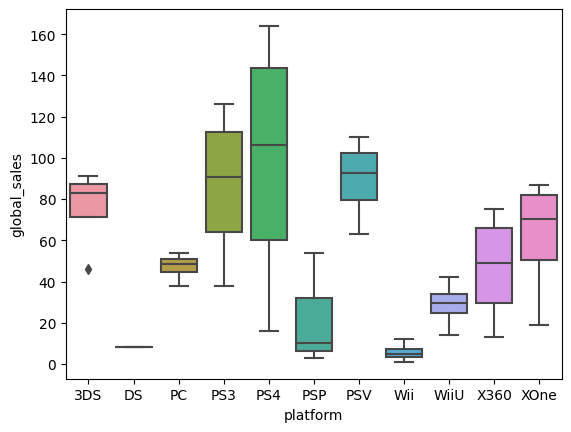

In [17]:
sns.boxplot(data=plataformas_top, x='platform', y='global_sales')  #Hue: sirve para agrupar por colores

Podemos observar que las ventas promedio de cada consola son independientes a las demas consolas, sinedo el Wii la consola menos vendida y el PS4  la mas comprada 

In [18]:
PS4 = df.query('platform == "PS4"')
PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [19]:
ventas_ps4 = PS4[['user_score','critic_score','global_sales']]
ventas_ps4

,user_score,critic_score,global_sales
31,NaN,NaN,14.63
42,8.3,97.0,12.62
77,4.3,82.0,8.58
87,NaN,NaN,7.98
92,5.7,83.0,7.66
...,...,...,...
16500,7.5,69.0,0.01
16503,NaN,NaN,0.01
16526,7.9,61.0,0.01
16530,5.5,51.0,0.01


In [20]:
ventas_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_score    257 non-null    float64
 1   critic_score  252 non-null    float64
 2   global_sales  392 non-null    float64
dtypes: float64(3)
memory usage: 12.2 KB


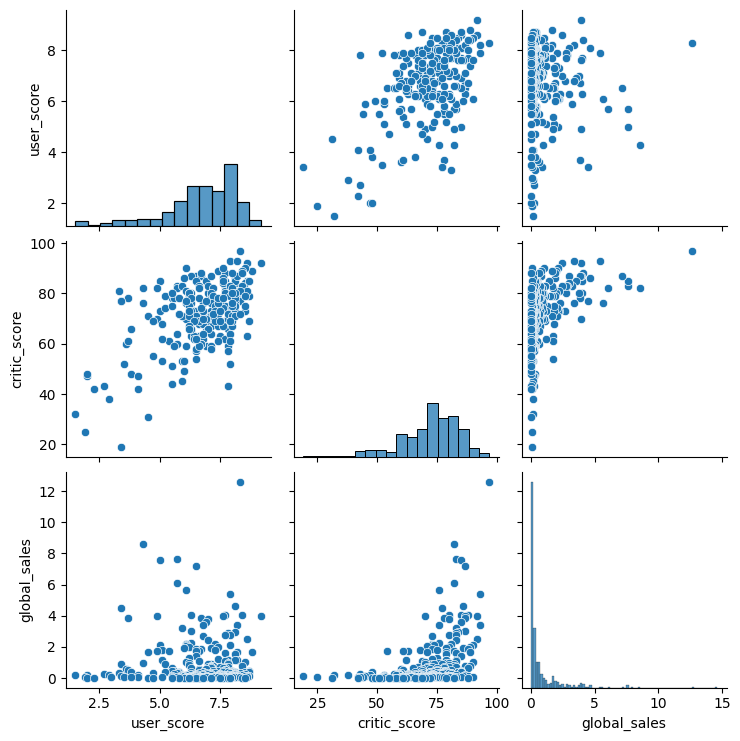

In [21]:
sns.pairplot(ventas_ps4, markers=["o"])

In [22]:
ventas_ps4.corr()  #Entre mas cercana la correlacion a 1, mas relacionados estan los valores 

,user_score,critic_score,global_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
global_sales,-0.031957,0.406568,1.000000


Mediante la correlacion de las resñas y las ventas podemos decir que los compradores se fijan mas en las reseñas de los profesionales que en las puntuaciones de los usuarios al momento de adquirir su nueva consola.

In [23]:
df.groupby(['name', 'platform']).size().unstack() 

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
uDraw Studio: Instant Artist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN


In [24]:
fifas = df.query('name == "FIFA 16"')  #Para filtrar sobre el juego fifa en deferentes plataformas 
fifas[['name', 'genre','platform', 'global_sales']]

,name,genre,platform,global_sales
77,FIFA 16,Sports,PS4,8.58
417,FIFA 16,Sports,XOne,3.25
552,FIFA 16,Sports,PS3,2.70
1182,FIFA 16,Sports,X360,1.57
7575,FIFA 16,Sports,PC,0.20


In [25]:
blackopps = df.query('name == "Call of Duty: Black Ops 3"')

In [26]:
blackopps[['name', 'genre','platform', 'global_sales']]

,name,genre,platform,global_sales
31,Call of Duty: Black Ops 3,Shooter,PS4,14.63
99,Call of Duty: Black Ops 3,Shooter,XOne,7.39
1049,Call of Duty: Black Ops 3,Shooter,X360,1.70
1062,Call of Duty: Black Ops 3,Shooter,PS3,1.69
6463,Call of Duty: Black Ops 3,Shooter,PC,0.26


In [27]:
theft_auto = df.query('name == "Grand Theft Auto V"')

In [28]:
theft_auto[['name', 'genre','platform', 'global_sales']]

,name,genre,platform,global_sales
16,Grand Theft Auto V,Action,PS3,21.05
23,Grand Theft Auto V,Action,X360,16.27
42,Grand Theft Auto V,Action,PS4,12.62
165,Grand Theft Auto V,Action,XOne,5.47
1730,Grand Theft Auto V,Action,PC,1.17


<AxesSubplot:xlabel='genre', ylabel='global_sales'>

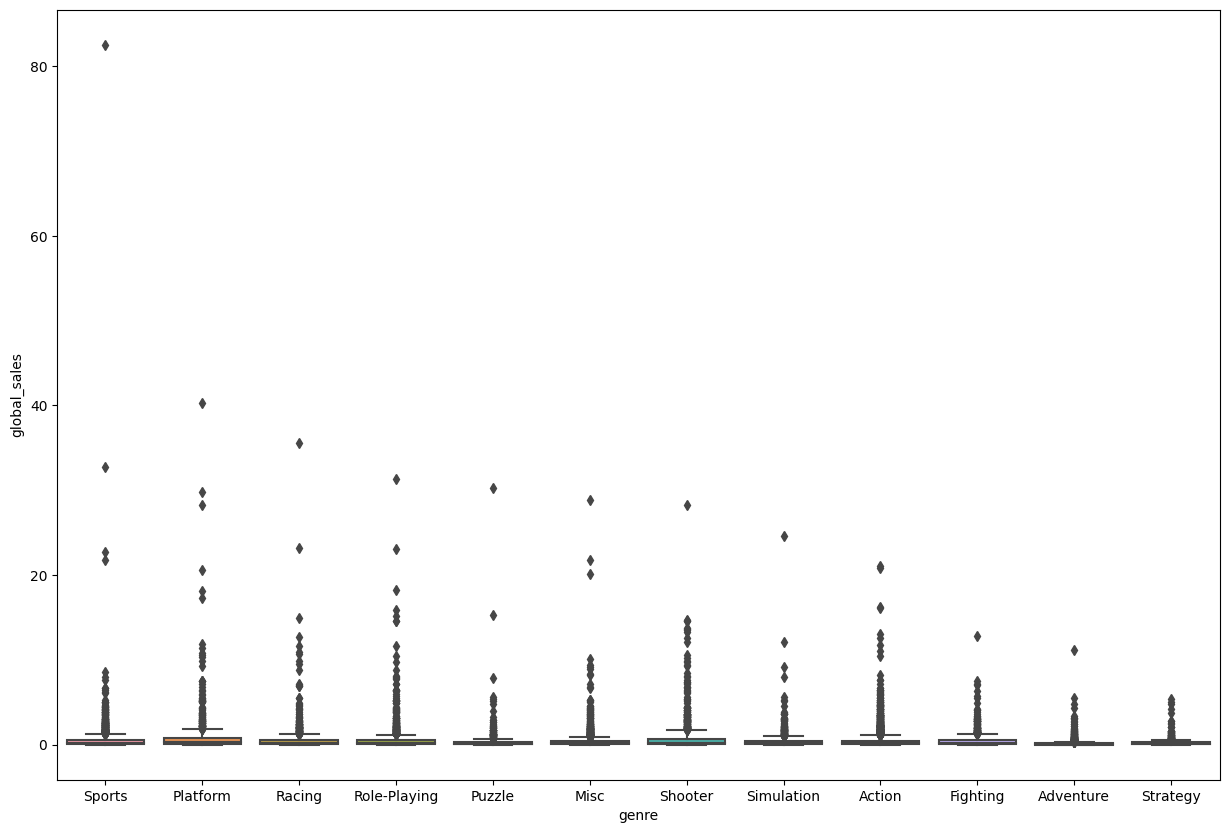

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='genre', y='global_sales')

(0.0, 2.0)

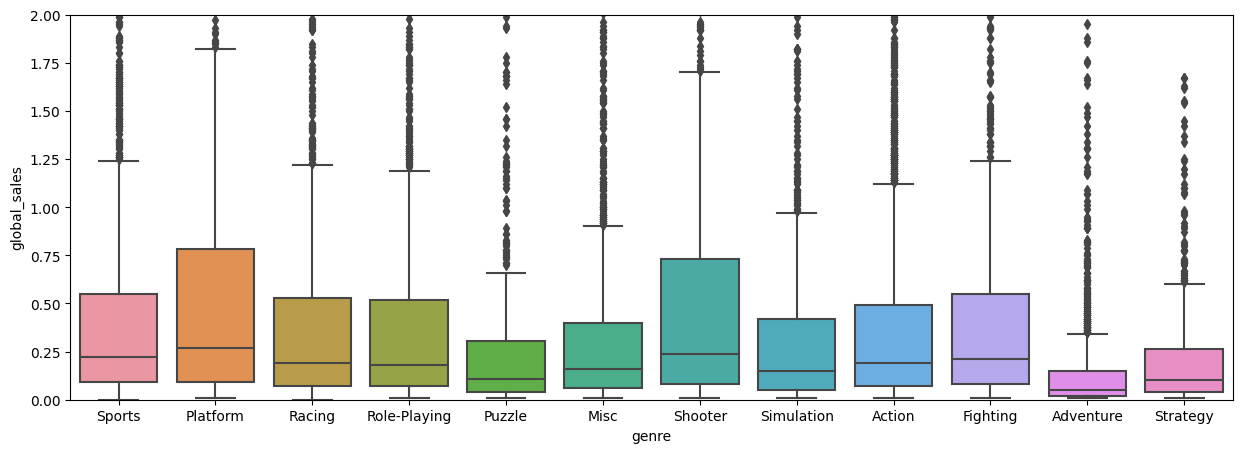

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='genre', y='global_sales')
plt.ylim(0,2) #esta parte de codigo me ayudo a cortar mi imagen superior y hacer mas facil la visualizacion 

Mediante las ultimas dos tablas puedo observar que los juegos mas vendidos estan en la categoria  de 'sports', 'platform', 'racing'; lo cual no idica que estos generos sean los mas rentables, para saber cuales son los mas rentables determine cual es la media de las ventas para cada genero, de esta forma observamos que 'sports', 'platform' y 'shooter' representas los generos mas rentables, no se podria generalizar debido a que tenemos numerosas ventas fuera de rango lo cual me indicaria que el hecho que los compradores se fijen mas en la critica de los juegos, es mas importante que el genero a la hora de adquierir nuevos juegos.

Paso 4.


In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [32]:
ventas_NA = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
ventas_NA.head(5)

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [33]:
ventas_EU = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
ventas_EU.head(5)

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [34]:
ventas_JP = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
ventas_JP.head(5)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

In [35]:
regiones = {
    'NA': 'na_sales',
    'UE': 'eu_sales',
    'JP': 'jp_sales'
}
for region, columna in regiones.items():
    top_5_platforms = df.groupby('platform')[columna].sum().nlargest(5)
    print(f"\nTop 5 plataformas en {region}:")
    print(top_5_platforms)    #Esta linea de codigo hace lo mismo lo mismo que las lineas anteriores pero todo metido en un bucle for para facilitar el analisis
    


Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en UE:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [36]:
for region, columna in regiones.items():
    top_5_genres = df.groupby('genre')[columna].sum().nlargest(5)
    print(f"\nTop 5 géneros en {region}:")
    print(top_5_genres)


Top 5 géneros en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en UE:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [37]:
# Filtrar datos sin rating missing
df_clean = df.dropna(subset=['rating'])

# Agrupar por rating y calcular ventas por región
for region, columna in regiones.items():
    rating_impact = df_clean.groupby('rating')[columna].sum().sort_values(ascending=False)
    print(f"\nImpacto de ESRB en ventas de {region}:")
    print(rating_impact)


Impacto de ESRB en ventas de NA:
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Impacto de ESRB en ventas de UE:
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64

Impacto de ESRB en ventas de JP:
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


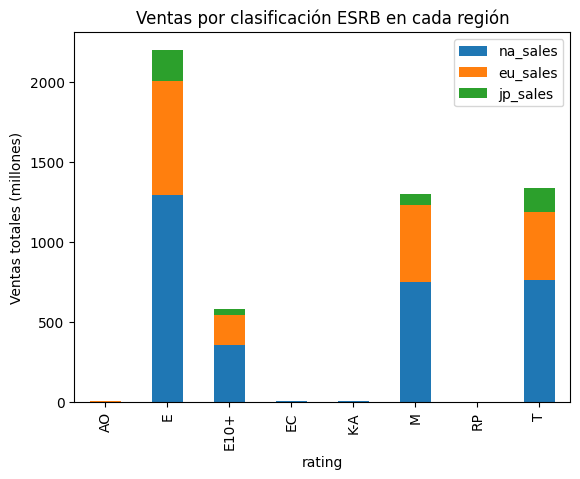

In [38]:
df_clean.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(kind='bar', stacked=True)
plt.title("Ventas por clasificación ESRB en cada región")
plt.ylabel("Ventas totales (millones)")
plt.show()

Las rating influye directamente en los compradores dependiendo de la region donde estan localiazados

Paso 5

In [45]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [39]:
calificacion_xbox = df.query('platform == "XOne" and user_score.isna()==False' )[ 'user_score']
calificacion_xbox 

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [40]:
calificacion_pc = df.query('platform == "PC" and user_score.isna()==False' )[ 'user_score']
calificacion_pc

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 770, dtype: float64

In [41]:
alpha = 0.05 # tu código: establece un nivel crítico de significación estadística

Hipotesis nula: Las varianzas son iguales 

Hipotesis alterna: Las varianzas son diferentes


In [42]:
w_stats, p_value = levene(calificacion_xbox, calificacion_pc,
                          center='mean')

In [43]:
print('valor p:', p_value)# tu código: imprime el valor p obtenido)

if  p_value < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.07549452472407711
No podemos rechazar la hipótesis nula


La hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

La hipotesis alternativa : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [44]:
results = st.ttest_ind( calificacion_xbox, calificacion_pc, equal_var=True)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if  results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula


Se realizo una prueba de levenes para comparar las varianzas y despues un ttest_ind parar contrastar dos sucesos independientes y ver como se relacionan, en este caso rechazamos la hipotesis nula lo que indica que nuestras calificaciones son diferentes.

In [54]:
calificacion_genero = df.query('genre == "Action" and user_score.isna()==False' )[ 'user_score']
calificacion_genero

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

In [55]:
calificacion_genero1 = df.query('genre == "Sports" and user_score.isna()==False' )[ 'user_score']
calificacion_genero1

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1103, dtype: float64

Hipotesis nula: La calificacion de juegos de deportes y accion es diferente

hipotesis alternativa:las calificaciones son las mismas 

In [56]:
alpha = 0.05

In [57]:
results = st.ttest_ind( calificacion_genero, calificacion_genero1)# tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results.pvalue)# tu código: imprime el valor p obtenido)

if  results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.10406951359049141
No podemos rechazar la hipótesis nula


Se escogio el Ttest_ind porque son pruebas independientes y se concluye  no rechazo mi hipotesis nula por tanto, las calificaciones de los generos de deporte y accion son diferentes y una variable no se relaciona con la otra.
    

## Paso 6! Conclusion general: 

Sabemos que las consolas PS4, PS3, PSV, 3DS, XOne, X360, PC, WIIU, PSP,WII son las consolas mas vendidas en ese orden, siendo que las como PS3,3DS, X360, PSP, Wii, sus ventas decaen  dervidado de la paricion de sus consolas consecueltes como PS4, XOne, WiiU sinedo que sus ventas se disparan cuando las de las otras consolas decaen y solo las ventas de la PC se mantienen estables a  lo largo de los años asi que podemos decir que las mejores ventas son el PS4, XOne y PC, seria bueno incluir en el alasisi consolas consecuentes al WiiU y 3DS.
Tambien pudimos ver como los usuarios se fijan en la critica de expertos a la hora de compra sus juegos, siendo que la calificacion de los usuarios pasa ser solo un dato mas ya que no se relaciona considerablemente con las ventas.
Dependiendo de la region del mundo los clientes consumen juegos por su clasificacion, siendo los jugeos de accion, shooter, deportes y los role'playin los mas importantes, exepto por el roleplaying que solo es tendencia en japon.
